<a href="https://colab.research.google.com/github/SACH13/Chatbox/blob/main/densnet_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir='/content/drive/MyDrive/cnn_with-preprocessed_imge/train'
validation_dir='/content/drive/MyDrive/cnn_with-preprocessed_imge/validate'
test_dir='/content/drive/MyDrive/cnn_with-preprocessed_imge/test'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        )

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        )

Found 4096 images belonging to 3 classes.
Found 1026 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=150,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
150/150 [==============================] - 748s 5s/step - loss: 0.9976 - acc: 0.5353 - val_loss: 1.0017 - val_acc: 0.5083
Epoch 2/100
150/150 [==============================] - 274s 2s/step - loss: 0.9848 - acc: 0.5340 - val_loss: 0.9795 - val_acc: 0.5250
Epoch 3/100
150/150 [==============================] - 192s 1s/step - loss: 0.9692 - acc: 0.5343 - val_loss: 1.0033 - val_acc: 0.4667
Epoch 4/100
150/150 [==============================] - 182s 1s/step - loss: 0.9547 - acc: 0.5391 - val_loss: 0.9415 - val_acc: 0.4833
Epoch 5/100
150/150 [==============================] - 181s 1s/step - loss: 0.9525 - acc: 0.5297 - val_loss: 0.9966 - val_acc: 0.5667
Epoch 6/100
150/150 [==============================] - 174s 1s/step - loss: 0.9418 - acc: 0.5397 - val_loss: 0.9432 - val_acc: 0.5750
Epoch 7/100
150/150 [==============================] - 174s 1s/step - loss: 0.9485 - acc: 0.5453 - val_loss: 0.8929 - val_acc: 0.6250
Epoch 8/100
150/150 [==============================] - 167s 1s

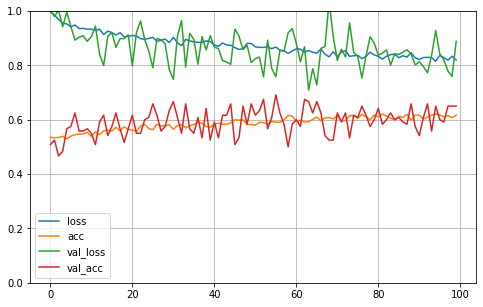

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()